In [11]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [23]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [24]:
data_train.drop(columns='Id', axis=1 , inplace=True)
data_test.drop(columns='Id', axis=1 , inplace=True)

In [27]:
data_train.head()

,Comment,Topic
0,A few things. You might have negative- frequen...,Biology
1,Is it so hard to believe that there exist part...,Physics
2,There are bees,Biology
3,I'm a medication technician. And that's alot o...,Biology
4,Cesium is such a pretty metal.,Chemistry


Topic
Biology      3591
Chemistry    2920
Physics      2184
Name: count, dtype: int64


<Axes: xlabel='Topic', ylabel='count'>

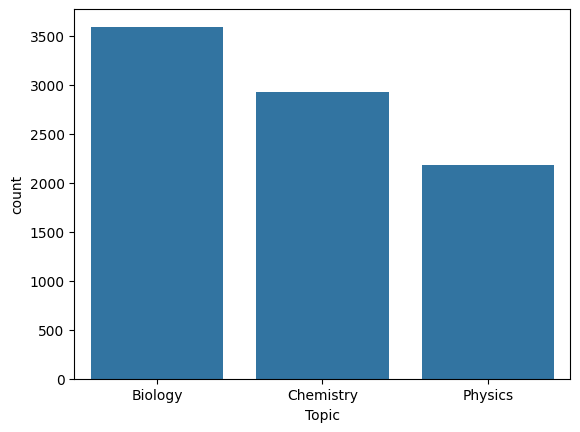

In [28]:
x = data_train['Topic'].value_counts()
print(x)
sns.barplot(x)

## Порядок выполнения операций NLP:
#### Токенизация - разбиение длинных участков текста на более мелкие (абзацы, предложения, слова). 
#### Удаление коротких слов, специальных символов и данных (URL, хэш-тэги, имя пользователя и т.д.)
#### Стеммизация (стемминг) - приведение слова к его корню путем устранения придатков (суффикса, приставки, окончания)
#### Лемматизация - приведение слова к смысловой канонической форме слова (инфинитив для глагола, именительный падеж единственного числа — для существительных и прилагательных). 
#### Удаление стоп-слов – удаление слов, которые не несут смысловой нагрузки (артикли, междометья, союзы, предлоги и т.д.).
#### Приведение к одному регистру и замена специальных символов

In [32]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ksyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
data_train['tokens'] = data_train['Comment'].apply(word_tokenize)
data_train.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ksyuk/nltk_data'
    - 'c:\\Users\\ksyuk\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\ksyuk\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\ksyuk\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\ksyuk\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
